# Dataset: Monthly Milk Production

a. Import all the libraries from Keras for neural network architectures.  

In [ ]:
from numpy import array 
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

b. Define a function that extracts features (lagged values) 

In [ ]:
def split_sequence(sequence,steps):
  X,y=[],[]
  for start in range(len(sequence)):
    end_index = start+steps
    if end_index>len(sequence)-1:
      break
    sequence_x,sequence_y = sequence[start:end_index],sequence[end_index]
    X.append(sequence_x)
    y.append(sequence_y)
  return(array(X),array(y))

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Time Series Analysis/monthly-milk-production-pounds.csv')
df = df.dropna()
df.head()

,Month,Monthly milk production: pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


c. Initializing Sequence, steps, and reshaping the output to input it to our CNN model. 

In [ ]:
raw_sequence = df["Monthly milk production: pounds per cow"]
steps=3
X,y = split_sequence(raw_sequence,steps)

print("The input raw sequence on which we will test our CNN model: ",raw_sequence)
print("The features (X), lagged values of time series, for our CNN model: ",X)
print("The respectice observed values (y)of the sequence for training our CNN model: ",y)


The input raw sequence on which we will test our CNN model:  0      589.0
1      561.0
2      640.0
3      656.0
4      727.0
       ...  
163    858.0
164    817.0
165    827.0
166    797.0
167    843.0
Name: Monthly milk production: pounds per cow, Length: 168, dtype: float64
The features (X), lagged values of time series, for our CNN model:  [[589. 561. 640.]
 [561. 640. 656.]
 [640. 656. 727.]
 [656. 727. 697.]
 [727. 697. 640.]
 [697. 640. 599.]
 [640. 599. 568.]
 [599. 568. 577.]
 [568. 577. 553.]
 [577. 553. 582.]
 [553. 582. 600.]
 [582. 600. 566.]
 [600. 566. 653.]
 [566. 653. 673.]
 [653. 673. 742.]
 [673. 742. 716.]
 [742. 716. 660.]
 [716. 660. 617.]
 [660. 617. 583.]
 [617. 583. 587.]
 [583. 587. 565.]
 [587. 565. 598.]
 [565. 598. 628.]
 [598. 628. 618.]
 [628. 618. 688.]
 [618. 688. 705.]
 [688. 705. 770.]
 [705. 770. 736.]
 [770. 736. 678.]
 [736. 678. 639.]
 [678. 639. 604.]
 [639. 604. 611.]
 [604. 611. 594.]
 [611. 594. 634.]
 [594. 634. 658.]
 [634. 658. 622.]
 [658

d. Reshaping the X matrices

In [ ]:
features = 1
X = X.reshape((X.shape[0],X.shape[1],features))

print("After reshaping, the shape of input X",X.shape)
print("Final form of input feature matrix X",X)
print("Feature matrix X is ready for input to CNN model. We have used feature engineering to convert a sequence to matrix with image matrix shape to find patterns in sequence.")

After reshaping, the shape of input X (165, 3, 1)
Final form of input feature matrix X [[[589.]
  [561.]
  [640.]]

 [[561.]
  [640.]
  [656.]]

 [[640.]
  [656.]
  [727.]]

 [[656.]
  [727.]
  [697.]]

 [[727.]
  [697.]
  [640.]]

 [[697.]
  [640.]
  [599.]]

 [[640.]
  [599.]
  [568.]]

 [[599.]
  [568.]
  [577.]]

 [[568.]
  [577.]
  [553.]]

 [[577.]
  [553.]
  [582.]]

 [[553.]
  [582.]
  [600.]]

 [[582.]
  [600.]
  [566.]]

 [[600.]
  [566.]
  [653.]]

 [[566.]
  [653.]
  [673.]]

 [[653.]
  [673.]
  [742.]]

 [[673.]
  [742.]
  [716.]]

 [[742.]
  [716.]
  [660.]]

 [[716.]
  [660.]
  [617.]]

 [[660.]
  [617.]
  [583.]]

 [[617.]
  [583.]
  [587.]]

 [[583.]
  [587.]
  [565.]]

 [[587.]
  [565.]
  [598.]]

 [[565.]
  [598.]
  [628.]]

 [[598.]
  [628.]
  [618.]]

 [[628.]
  [618.]
  [688.]]

 [[618.]
  [688.]
  [705.]]

 [[688.]
  [705.]
  [770.]]

 [[705.]
  [770.]
  [736.]]

 [[770.]
  [736.]
  [678.]]

 [[736.]
  [678.]
  [639.]]

 [[678.]
  [639.]
  [604.]]

 [[639.]
  [60

e. Define the CNN model. 

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64,kernel_size=2,activation="relu",input_shape=(steps,features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

f. Implement CNN Model Fitting. 

In [ ]:
model.fit(X,y,epochs=1000,verbose=0)

g. Predict the future values. 

In [ ]:
x_input = array(raw_sequence[-3:])
x_input = x_input.reshape((1,steps,features))
y_pred = model.predict(x_input,verbose=0)

print(f"The predicted next value for the sequence {raw_sequence}")
print("is",y_pred)

The predicted next value for the sequence 0      589.0
1      561.0
2      640.0
3      656.0
4      727.0
       ...  
163    858.0
164    817.0
165    827.0
166    797.0
167    843.0
Name: Monthly milk production: pounds per cow, Length: 168, dtype: float64
is [[827.3855]]


h. Plot the graph the predicted value. 

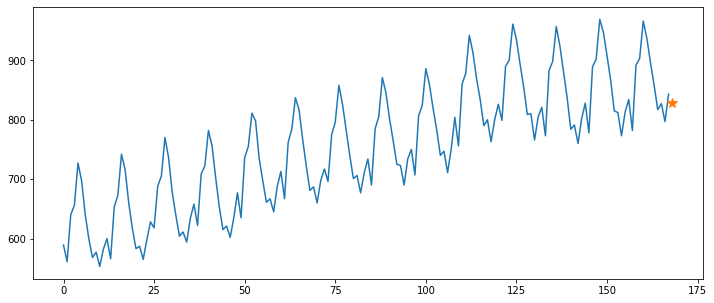

In [ ]:
df["Monthly milk production: pounds per cow"].plot(figsize=(12,5))
plt.plot([168], [827.7379], marker='*', ls='none', ms=10)